# GROUPE 5
<ul>
    <li>Tamsir Gueye</li>
    <li>Bineta Faye</li>
    <li>Malang Coulibaly</li>
</ul>

# Introduction
<div style="font-size: 1rem;">
L’analyse factorielle discriminante ou analyse discriminante est une technique statistique qui vise à décrire, expliquer et prédire l’appartenance à des groupes prédéfinis (classes, modalités de la variable à prédire, ...) d’un ensemble d’observations (individus, exemples, ...) à partir d’une série de variables prédictives (descripteurs, variables exogènes, ...).<br>
    <div style="margin-top: 1.5rem;">L’analyse discriminante est utilisée dans de nombreux domaines :</div>
    <ul>
        <li>En médecine, par exemple pour détecter les groupes à hauts risques cardiaques à partir de caractéristiques telles que l’alimentation, le fait de fumer ou pas, les antécédents familiaux, etc.</li>
        <li>Dans le domaine bancaire, lorsque l’on veut évaluer la fiabilité d’un demandeur de crédit à partir de ses revenus, du nombre de personnes à charge, des encours de crédits qu’il détient, etc.</li>
        <li>En biologie, lorsque l’on veut affecter un objet à sa famille d’appartenance à partir de ses caractéristiques physiques. Les iris de Sir Ronald Fisher -- qui est à l'origine de cette méthode—en est un exemple très fameux, il s’agit de reconnaître le type d’iris (setosa, virginica, et versicolor) à partir de la longueur/largeur de ses pétales et sépales.</li>
    </ul>
    On distingue l'<u>analyse discriminante linéaire</u> et l'<u>analyse discriminante quadratique</u>.
    Dans ce projet nous nous intéressons particulièrement à l'<strong>analyse discriminante quadratique</strong>.
</div>

# Définition
<strong><u>QDA:</u></strong> Quadratic Discriminant Analysis
<div style="padding-left: 1.2rem;">L'analyse discriminante quadratique est utilisée dans la situation où les matrices de
variance-covariances intra-groupes ne sont pas identiques pour tous les groupes, 
Ainsi, une fonction quadratique (ellipse, parabole) serait plus robuste pour la discrimination des
groupes d'où l'analyse discriminante quadratique.
Contrairement à la distance linéaire, la distance quadratique n'est pas symétrique
Cependant, l'ADQ ne fonctionne pas bien lorsque les densités de probabilités des groupes sont 
très différentes de la densité d'une distribution gaussienne.</div>

# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### 1. Chargement des donnees

Les données utilisées sont celles de l'inclusion financiére en Afrique.
Notre objectif est de predire qui en Afrique est le plus susceptible d'avoir un compte banquaire avec le modéle QDA

In [2]:
#Chargement des donnees dans un dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
#Affichage des dimensions
print('donnees train :', train.shape)
print('donnes test :', test.shape)

donnees train : (23524, 13)
donnes test : (10086, 12)


La sortie ci-dessus montre le nombre de lignes et de colonnes pour l'ensemble de données d'entraînement(train) et de test. Nous avons 13 variables dans le jeu de données train, 12 variables indépendantes et 1 variable dépendante.
Dans l'ensemble de données de test, nous avons 12 variables indépendantes.
Nous pouvons observer les cinq premières lignes de notre ensemble de données en utilisant la méthode head() de la bibliothèque pandas.

In [4]:
# Voir les donnees du train
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Preprocessing, Normalisation des données

In [5]:
# Verification des valeurs manquantes
print('valeurs manquantes:', train.isnull().sum())

valeurs manquantes: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


On a pas eu de donnees manquantes


In [6]:
 #Voir les informations
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


La fonction info() permet d'afficher la liste des variables/caractéristiques, les tailles, si elle contient des valeurs manquantes et le type de données pour chaque variable.
À partir de l'ensemble de données, nous n'avons aucune valeur manquante et nous avons 3 caractéristiques de type de données entier et 10 caractéristiques de type de données objet.


In [7]:
#Voir la liste compléte des variables et leurs définitions
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [8]:
#Voir les données de SampleSubmission ou soumission
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


On observe le format de soumission avec la colonne id comme données test et 
la colonne cible (bank_account) permettant de faire la prediction

On a des variables categorielles, on doit les transformer en données numériques avant de faire
la separation

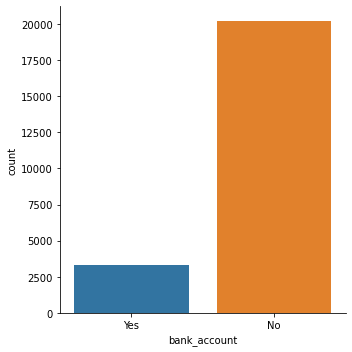

In [9]:
# Exploration de la distribution cible 
sns.catplot(x="bank_account", kind="count", data=train)

In [10]:
#importation en faisant appel à la classe LabelEncoder() et MinMaxScaler de la bibliotheque preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Transformation des données categorielles en données numériques
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separation de X_train et y_train
X_train = train.drop(['bank_account'], axis=1)
y = train['bank_account']

print(y)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


On observe que les valeurs cibles ont été transformées en types de données numériques, 1 représente "Oui" et 0 représente "Non".
On a créé une fonction de prétraitement simple pour :
Gérer la conversion des types de données;
Convertir les caractéristiques catégorielles en caractéristiques numériques à l'aide de l'encodeur à chaud et de l'encodeur d'étiquettes;
Supprimer la variable d'ID unique;
Effectuer la mise à l'échelle des fonctionnalités.
La fonction de traitement sera utilisée à la fois pour l'apprentissage et le test des variables indépendantes.

# Conversion des données train

In [11]:
# fonction de préparation et de transformation des données
def preprocessing_data(data):

    # Conversion des entiers en float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # Donnees categorielles à convertir
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # Creation des dummies variables avec la fonction get_dummies()
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Conversion des donnees categorielles en donnees en donnees numeriques
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # suppression de la colonne uniqueid
    data = data.drop(["uniqueid"], axis=1)
    
    # Utilisation de la fonction MinMasScaler()
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

In [12]:
# Pretaitement des données Train et Test
X = preprocessing_data(X_train)
Y = preprocessing_data(test)

In [13]:
#Normalisation
#Centrer et réduire
X_cr=(X-X.mean())/X.std()
X_cr.mean()

-9.404371746802983e-18

In [14]:
# Affichage de la colonne
print(X[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


In [15]:
# Voir la dimension
print(X.shape)

(23524, 37)


On a plus de variables indépendantes qu'auparavant (37 variables). Cela ne signifie pas que toutes ces variables sont importantes pour former notre modèle. On va sélectionner uniquement les fonctionnalités importantes qui peuvent augmenter les performances de notre modèle. Mais on n'appliquera aucune technique de sélection de fonctionnalités dans ce cas

# Modéle QDA

In [16]:
#train test split
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X_cr, y,test_size = 0.3, random_state=15)

In [17]:
print('Taille du X',X.shape, 'taille du train',X_Train.shape)
print('Pourcentage Train',X_Train.shape[0]/X.shape[0])

Taille du X (23524, 37) taille du train (16466, 37)
Pourcentage Train 0.699965992178201


In [18]:
### Application du modéle qda
from sklearn.metrics import accuracy_score
#Appel de la fonction
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
####  1. Instanciation du modele
model_qda=QuadraticDiscriminantAnalysis()
#### 2. Fitting du modéle
model_qda.fit(X_Train,y_Train)
model_qda
#### 3.Prediction
pred=model_qda.predict(X_Test)
pred
#Mesure d'evaluation
qda_acc=accuracy_score(pred,y_Test)
print('Le taux accurancy est de :',qda_acc)

Le taux accurancy est de : 0.6805043921790875


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [19]:
#optimisation du modéle QDA
from sklearn.model_selection import GridSearchCV
#parametre du grid
params=[
     {'priors':[None,''],
      'reg_param':[1,6,9,6,3,7]
     }
]
##instantiation du model
qda_best_model=GridSearchCV(model_qda,params,cv=5,verbose=10)
qda_best_model.fit(X_Train,y_Train)

C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START priors=None, reg_param=1...................................
[CV 1/5; 1/12] END ....priors=None, reg_param=1;, score=0.829 total time=   0.0s
[CV 2/5; 1/12] START priors=None, reg_param=1...................................
[CV 2/5; 1/12] END ....priors=None, reg_param=1;, score=0.835 total time=   0.0s
[CV 3/5; 1/12] START priors=None, reg_param=1...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[CV 3/5; 1/12] END ....priors=None, reg_param=1;, score=0.843 total time=   0.0s
[CV 4/5; 1/12] START priors=None, reg_param=1...................................
[CV 4/5; 1/12] END ....priors=None, reg_param=1;, score=0.840 total time=   0.0s
[CV 5/5; 1/12] START priors=None, reg_param=1...................................
[CV 5/5; 1/12] END ....priors=None, reg_param=1;, score=0.836 total time=   0.0s
[CV 1/5; 2/12] START priors=None, reg_param=6...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S

[CV 1/5; 2/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 2/5; 2/12] START priors=None, reg_param=6...................................
[CV 2/5; 2/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 3/5; 2/12] START priors=None, reg_param=6...................................
[CV 3/5; 2/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 4/5; 2/12] START priors=None, reg_param=6...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([

[CV 4/5; 2/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 5/5; 2/12] START priors=None, reg_param=6...................................
[CV 5/5; 2/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 1/5; 3/12] START priors=None, reg_param=9...................................
[CV 1/5; 3/12] END ....priors=None, reg_param=9;, score=0.858 total time=   0.0s
[CV 2/5; 3/12] START priors=None, reg_param=9...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([

[CV 2/5; 3/12] END ....priors=None, reg_param=9;, score=0.858 total time=   0.0s
[CV 3/5; 3/12] START priors=None, reg_param=9...................................
[CV 3/5; 3/12] END ....priors=None, reg_param=9;, score=0.858 total time=   0.0s
[CV 4/5; 3/12] START priors=None, reg_param=9...................................
[CV 4/5; 3/12] END ....priors=None, reg_param=9;, score=0.858 total time=   0.0s
[CV 5/5; 3/12] START priors=None, reg_param=9...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in

[CV 5/5; 3/12] END ....priors=None, reg_param=9;, score=0.858 total time=   0.0s
[CV 1/5; 4/12] START priors=None, reg_param=6...................................
[CV 1/5; 4/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 2/5; 4/12] START priors=None, reg_param=6...................................
[CV 2/5; 4/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 3/5; 4/12] START priors=None, reg_param=6...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in

[CV 3/5; 4/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 4/5; 4/12] START priors=None, reg_param=6...................................
[CV 4/5; 4/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 5/5; 4/12] START priors=None, reg_param=6...................................
[CV 5/5; 4/12] END ....priors=None, reg_param=6;, score=0.858 total time=   0.0s
[CV 1/5; 5/12] START priors=None, reg_param=3...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([

[CV 1/5; 5/12] END ....priors=None, reg_param=3;, score=0.858 total time=   0.0s
[CV 2/5; 5/12] START priors=None, reg_param=3...................................
[CV 2/5; 5/12] END ....priors=None, reg_param=3;, score=0.858 total time=   0.0s
[CV 3/5; 5/12] START priors=None, reg_param=3...................................
[CV 3/5; 5/12] END ....priors=None, reg_param=3;, score=0.858 total time=   0.0s
[CV 4/5; 5/12] START priors=None, reg_param=3...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([

[CV 4/5; 5/12] END ....priors=None, reg_param=3;, score=0.858 total time=   0.0s
[CV 5/5; 5/12] START priors=None, reg_param=3...................................
[CV 5/5; 5/12] END ....priors=None, reg_param=3;, score=0.858 total time=   0.0s
[CV 1/5; 6/12] START priors=None, reg_param=7...................................
[CV 1/5; 6/12] END ....priors=None, reg_param=7;, score=0.858 total time=   0.0s
[CV 2/5; 6/12] START priors=None, reg_param=7...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear

[CV 2/5; 6/12] END ....priors=None, reg_param=7;, score=0.858 total time=   0.0s
[CV 3/5; 6/12] START priors=None, reg_param=7...................................
[CV 3/5; 6/12] END ....priors=None, reg_param=7;, score=0.858 total time=   0.0s
[CV 4/5; 6/12] START priors=None, reg_param=7...................................
[CV 4/5; 6/12] END ....priors=None, reg_param=7;, score=0.858 total time=   0.0s
[CV 5/5; 6/12] START priors=None, reg_param=7...................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear

[CV 5/5; 6/12] END ....priors=None, reg_param=7;, score=0.858 total time=   0.0s
[CV 1/5; 7/12] START priors=, reg_param=1.......................................
[CV 1/5; 7/12] END ..........priors=, reg_param=1;, score=nan total time=   0.0s
[CV 2/5; 7/12] START priors=, reg_param=1.......................................
[CV 2/5; 7/12] END ..........priors=, reg_param=1;, score=nan total time=   0.0s
[CV 3/5; 7/12] START priors=, reg_param=1.......................................
[CV 3/5; 7/12] END ..........priors=, reg_param=1;, score=nan total time=   0.0s
[CV 4/5; 7/12] START priors=, reg_param=1.......................................

C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 951, in predict
    d = self


[CV 4/5; 7/12] END ..........priors=, reg_param=1;, score=nan total time=   0.0s
[CV 5/5; 7/12] START priors=, reg_param=1.......................................
[CV 5/5; 7/12] END ..........priors=, reg_param=1;, score=nan total time=   0.0s
[CV 1/5; 8/12] START priors=, reg_param=6.......................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py"

[CV 1/5; 8/12] END ..........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 2/5; 8/12] START priors=, reg_param=6.......................................
[CV 2/5; 8/12] END ..........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 3/5; 8/12] START priors=, reg_param=6.......................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", li

[CV 3/5; 8/12] END ..........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 4/5; 8/12] START priors=, reg_param=6.......................................
[CV 4/5; 8/12] END ..........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 5/5; 8/12] START priors=, reg_param=6.......................................
[CV 5/5; 8/12] END ..........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 1/5; 9/12] START priors=, reg_param=9.......................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\base.py", line 651, in 

[CV 1/5; 9/12] END ..........priors=, reg_param=9;, score=nan total time=   0.0s
[CV 2/5; 9/12] START priors=, reg_param=9.......................................
[CV 2/5; 9/12] END ..........priors=, reg_param=9;, score=nan total time=   0.0s
[CV 3/5; 9/12] START priors=, reg_param=9.......................................
[CV 3/5; 9/12] END ..........priors=, reg_param=9;, score=nan total time=   0.0s
[CV 4/5; 9/12] START priors=, reg_param=9.......................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\base.py", line 651, in 

[CV 4/5; 9/12] END ..........priors=, reg_param=9;, score=nan total time=   0.0s
[CV 5/5; 9/12] START priors=, reg_param=9.......................................
[CV 5/5; 9/12] END ..........priors=, reg_param=9;, score=nan total time=   0.0s
[CV 1/5; 10/12] START priors=, reg_param=6......................................
[CV 1/5; 10/12] END .........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 2/5; 10/12] START priors=, reg_param=6......................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py"

[CV 2/5; 10/12] END .........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 3/5; 10/12] START priors=, reg_param=6......................................
[CV 3/5; 10/12] END .........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 4/5; 10/12] START priors=, reg_param=6......................................
[CV 4/5; 10/12] END .........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 5/5; 10/12] START priors=, reg_param=6......................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\base.py", line 651, in 

[CV 5/5; 10/12] END .........priors=, reg_param=6;, score=nan total time=   0.0s
[CV 1/5; 11/12] START priors=, reg_param=3......................................
[CV 1/5; 11/12] END .........priors=, reg_param=3;, score=nan total time=   0.0s
[CV 2/5; 11/12] START priors=, reg_param=3......................................
[CV 2/5; 11/12] END .........priors=, reg_param=3;, score=nan total time=   0.0s
[CV 3/5; 11/12] START priors=, reg_param=3......................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", li

[CV 3/5; 11/12] END .........priors=, reg_param=3;, score=nan total time=   0.0s
[CV 4/5; 11/12] START priors=, reg_param=3......................................
[CV 4/5; 11/12] END .........priors=, reg_param=3;, score=nan total time=   0.0s
[CV 5/5; 11/12] START priors=, reg_param=3......................................
[CV 5/5; 11/12] END .........priors=, reg_param=3;, score=nan total time=   0.0s
[CV 1/5; 12/12] START priors=, reg_param=7......................................
[CV 1/5; 12/12] END .........priors=, reg_param=7;, score=nan total time=   0.0s
[CV 2/5; 12/12] START priors=, reg_param=7......................................

C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\base.py", line 651, in 


[CV 2/5; 12/12] END .........priors=, reg_param=7;, score=nan total time=   0.0s
[CV 3/5; 12/12] START priors=, reg_param=7......................................
[CV 3/5; 12/12] END .........priors=, reg_param=7;, score=nan total time=   0.0s
[CV 4/5; 12/12] START priors=, reg_param=7......................................
[CV 4/5; 12/12] END .........priors=, reg_param=7;, score=nan total time=   0.0s
[CV 5/5; 12/12] START priors=, reg_param=7......................................
[CV 5/5; 12/12] END .........priors=, reg_param=7;, score=nan total time=   0.0s


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\base.py", line 651, in 

GridSearchCV(cv=5, estimator=QuadraticDiscriminantAnalysis(),
             param_grid=[{'priors': [None, ''],
                          'reg_param': [1, 6, 9, 6, 3, 7]}],
             verbose=10)

In [20]:
#parametres optionnaux
qda_best_model.best_params_

{'priors': None, 'reg_param': 6}

In [21]:
#model optimal
qda_best_model.best_estimator_

QuadraticDiscriminantAnalysis(reg_param=6)

In [22]:
#meilleur score
qda_best_model.best_score_

0.8577067950249015

In [23]:
#Mesure d'evaluation de qda_best
pred_qda_best = qda_best_model.best_estimator_.predict(X_Test)
qda_best_acc = accuracy_score(y_Test,pred_qda_best)
print('le taux accuracy knn_best est de', qda_best_acc)

le taux accuracy knn_best est de 0.86270898271465


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:906: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


# Modele KNN

In [24]:
### Application du modéle knn
from sklearn.metrics import accuracy_score
#Appel de la fonction
from sklearn.neighbors import KNeighborsClassifier
####  1. Instanciation du modele
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn
#### 2. Fitting du modéle
model_knn.fit(X_Train, y_Train)
model_knn
#### 3.Prediction
pred=model_knn.predict(X_Test)
pred
#Mesure d'evaluation
knn_acc=accuracy_score(pred,y_Test)
print('Le taux accurancy est de :',knn_acc)

Le taux accurancy est de : 0.8818362142249929


In [25]:
#optimisons le model knn
#parametre du grid
#Optimisation du models on utilise hyperparameters
from sklearn.model_selection import GridSearchCV
#parametre du grid
params=[
    {'n_neighbors': [1,2,3,4,5,6]},
    {'leaf_size':[2,4,5,6]}
]
##instantiation du model
knn_best_model=GridSearchCV(model_knn,params,cv=5,verbose=10)
knn_best_model.fit(X_Train,y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START n_neighbors=1..............................................
[CV 1/5; 1/10] END ...............n_neighbors=1;, score=0.835 total time=   1.4s
[CV 2/5; 1/10] START n_neighbors=1..............................................
[CV 2/5; 1/10] END ...............n_neighbors=1;, score=0.833 total time=   1.4s
[CV 3/5; 1/10] START n_neighbors=1..............................................
[CV 3/5; 1/10] END ...............n_neighbors=1;, score=0.829 total time=   1.4s
[CV 4/5; 1/10] START n_neighbors=1..............................................
[CV 4/5; 1/10] END ...............n_neighbors=1;, score=0.837 total time=   1.4s
[CV 5/5; 1/10] START n_neighbors=1..............................................
[CV 5/5; 1/10] END ...............n_neighbors=1;, score=0.839 total time=   1.4s
[CV 1/5; 2/10] START n_neighbors=2..............................................
[CV 1/5; 2/10] END ...............n_neighbors=2;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6]},
                         {'leaf_size': [2, 4, 5, 6]}],
             verbose=10)

In [26]:
#parametres optimaux
knn_best_model.best_params_

{'n_neighbors': 6}

In [27]:
#model optimal
knn_best_model.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [28]:
#meilleur score
knn_best_model.best_score_

0.8795698996104229

In [29]:
#Mesure d'evaluation de knn_best
pred_knn_best = knn_best_model.best_estimator_.predict(X_Test)
knn_best_acc = accuracy_score(y_Test,pred_knn_best)
print('le taux accuracy knn_best est de', knn_best_acc)

le taux accuracy knn_best est de 0.8858033437234344


# Modele de regression logistique

In [30]:
#Instanciation du modele regression logistique
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr
#Fiting du modele
model_lr .fit(X_Train,y_Train)
#Prediction
pred_lr=model_lr.predict(X_Test)
#Mesure d'evaluation
lr_acc=accuracy_score(y_Test,pred_lr)
print('Le taux accurancy est de :',lr_acc)

Le taux accurancy est de : 0.8863700765089261


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#optimisons le model de regression logistique
#parametre du grid
params=[
    {'penalty':['l1', 'l2','none']},
    {'solver':['newton-cg', 'lbfgs', 'saga']},
    {'max_iter':[15,8,39,77]}
]
##instantiation du model
lr_best_model=GridSearchCV(model_lr,params,cv=5,verbose=10)
lr_best_model.fit(X_Train,y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START penalty=l1.................................................
[CV 1/5; 1/10] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/10] START penalty=l1.................................................
[CV 2/5; 1/10] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/10] START penalty=l1.................................................
[CV 3/5; 1/10] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/10] START penalty=l1.................................................
[CV 4/5; 1/10] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/10] START penalty=l1.................................................
[CV 5/5; 1/10] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/10] START penalty=l2.................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 2/10] END ..................penalty=l2;, score=0.881 total time=   0.2s
[CV 2/5; 2/10] START penalty=l2.................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 2/10] END ..................penalty=l2;, score=0.886 total time=   0.2s
[CV 3/5; 2/10] START penalty=l2.................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 2/10] END ..................penalty=l2;, score=0.885 total time=   0.2s
[CV 4/5; 2/10] START penalty=l2.................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 2/10] END ..................penalty=l2;, score=0.879 total time=   0.3s
[CV 5/5; 2/10] START penalty=l2.................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 2/10] END ..................penalty=l2;, score=0.884 total time=   0.2s
[CV 1/5; 3/10] START penalty=none...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 3/10] END ................penalty=none;, score=0.881 total time=   0.3s
[CV 2/5; 3/10] START penalty=none...............................................
[CV 2/5; 3/10] END ................penalty=none;, score=0.886 total time=   0.2s
[CV 3/5; 3/10] START penalty=none...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 3/10] END ................penalty=none;, score=0.885 total time=   0.2s
[CV 4/5; 3/10] START penalty=none...............................................
[CV 4/5; 3/10] END ................penalty=none;, score=0.879 total time=   0.2s
[CV 5/5; 3/10] START penalty=none...............................................
[CV 5/5; 3/10] END ................penalty=none;, score=0.884 total time=   0.2s
[CV 1/5; 4/10] START solver=newton-cg...........................................
[CV 1/5; 4/10] END ............solver=newton-cg;, score=0.881 total time=   0.4s
[CV 2/5; 4/10] START solver=newton-cg...........................................
[CV 2/5; 4/10] END ............solver=newton-cg;, score=0.886 total time=   0.5s
[CV 3/5; 4/10] START solver=newton-cg...........................................
[CV 3/5; 4/10] END ............solver=newton-cg;, score=0.885 total time=   0.4s
[CV 4/5; 4/10] START solver=newton-cg...........................................
[CV 4/5; 4/10] END .........

C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 5/10] END ................solver=lbfgs;, score=0.881 total time=   0.3s
[CV 2/5; 5/10] START solver=lbfgs...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 5/10] END ................solver=lbfgs;, score=0.886 total time=   0.3s
[CV 3/5; 5/10] START solver=lbfgs...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 5/10] END ................solver=lbfgs;, score=0.885 total time=   0.4s
[CV 4/5; 5/10] START solver=lbfgs...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 5/10] END ................solver=lbfgs;, score=0.879 total time=   0.3s
[CV 5/5; 5/10] START solver=lbfgs...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 5/10] END ................solver=lbfgs;, score=0.884 total time=   0.3s
[CV 1/5; 6/10] START solver=saga................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 6/10] END .................solver=saga;, score=0.881 total time=   1.7s
[CV 2/5; 6/10] START solver=saga................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 6/10] END .................solver=saga;, score=0.886 total time=   1.6s
[CV 3/5; 6/10] START solver=saga................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 6/10] END .................solver=saga;, score=0.885 total time=   1.6s
[CV 4/5; 6/10] START solver=saga................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 6/10] END .................solver=saga;, score=0.879 total time=   1.6s
[CV 5/5; 6/10] START solver=saga................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 5/5; 6/10] END .................solver=saga;, score=0.884 total time=   1.1s
[CV 1/5; 7/10] START max_iter=15................................................
[CV 1/5; 7/10] END .................max_iter=15;, score=0.882 total time=   0.0s
[CV 2/5; 7/10] START max_iter=15................................................
[CV 2/5; 7/10] END .................max_iter=15;, score=0.886 total time=   0.0s
[CV 3/5; 7/10] START max_iter=15................................................
[CV 3/5; 7/10] END .................max_iter=15;, score=0.886 total time=   0.0s
[CV 4/5; 7/10] START max_iter=15................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5; 7/10] END .................max_iter=15;, score=0.880 total time=   0.0s
[CV 5/5; 7/10] START max_iter=15................................................
[CV 5/5; 7/10] END .................max_iter=15;, score=0.884 total time=   0.0s
[CV 1/5; 8/10] START max_iter=8.................................................
[CV 1/5; 8/10] END ..................max_iter=8;, score=0.882 total time=   0.0s
[CV 2/5; 8/10] START max_iter=8.................................................
[CV 2/5; 8/10] END ..................max_iter=8;, score=0.886 total time=   0.0s
[CV 3/5; 8/10] START max_iter=8.................................................
[CV 3/5; 8/10] END ..................max_iter=8;, score=0.884 total time=   0.0s
[CV 4/5; 8/10] START max_iter=8.................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5; 8/10] END ..................max_iter=8;, score=0.878 total time=   0.0s
[CV 5/5; 8/10] START max_iter=8.................................................
[CV 5/5; 8/10] END ..................max_iter=8;, score=0.885 total time=   0.0s
[CV 1/5; 9/10] START max_iter=39................................................
[CV 1/5; 9/10] END .................max_iter=39;, score=0.881 total time=   0.0s
[CV 2/5; 9/10] START max_iter=39................................................
[CV 2/5; 9/10] END .................max_iter=39;, score=0.886 total time=   0.0s
[CV 3/5; 9/10] START max_iter=39................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5; 9/10] END .................max_iter=39;, score=0.885 total time=   0.0s
[CV 4/5; 9/10] START max_iter=39................................................
[CV 4/5; 9/10] END .................max_iter=39;, score=0.879 total time=   0.0s
[CV 5/5; 9/10] START max_iter=39................................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5; 9/10] END .................max_iter=39;, score=0.885 total time=   0.0s
[CV 1/5; 10/10] START max_iter=77...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 10/10] END ................max_iter=77;, score=0.881 total time=   0.1s
[CV 2/5; 10/10] START max_iter=77...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 10/10] END ................max_iter=77;, score=0.886 total time=   0.2s
[CV 3/5; 10/10] START max_iter=77...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 10/10] END ................max_iter=77;, score=0.885 total time=   0.2s
[CV 4/5; 10/10] START max_iter=77...............................................


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 10/10] END ................max_iter=77;, score=0.879 total time=   0.2s
[CV 5/5; 10/10] START max_iter=77...............................................
[CV 5/5; 10/10] END ................max_iter=77;, score=0.884 total time=   0.2s


C:\Users\gueye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Tra

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', 'none']},
                         {'solver': ['newton-cg', 'lbfgs', 'saga']},
                         {'max_iter': [15, 8, 39, 77]}],
             verbose=10)

In [32]:
#parametres optimaux
lr_best_model.best_params_

{'max_iter': 15}

In [33]:
#model optimal
lr_best_model.best_estimator_

LogisticRegression(max_iter=15)

In [34]:
#meilleur score
lr_best_model.best_score_

0.8836391189494892

In [35]:
#Mesure d'evaluation de knn_best
pred_lr_best = lr_best_model.best_estimator_.predict(X_Test)
lr_best_acc = accuracy_score(y_Test,pred_lr_best)
print('le taux accuracy lr_best est de', lr_best_acc)

le taux accuracy lr_best est de 0.8867951260980448


# Modele Naive Bayesian

In [36]:
#Instanciation du modele Naive Bayesian
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
#Fitting du modele
gnb.fit(X_Train,y_Train)
#Prediction du modele
pred_gnb=gnb.predict(X_Test)
#Mesure d'evaluation
gnb_acc=accuracy_score(y_Test,pred_gnb)
print('Le taux accurancy est de :',gnb_acc)

Le taux accurancy est de : 0.8551997733068858


In [37]:
#optimisons le model de Naive Bayesian
#parametre du grid
params=[
    {'priors':[None,'']}
]
##instantiation du model
gnb_best_model=GridSearchCV(gnb,params,cv=5,verbose=10)
gnb_best_model.fit(X_Train,y_Train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START priors=None.................................................
[CV 1/5; 1/2] END ..................priors=None;, score=0.858 total time=   0.0s
[CV 2/5; 1/2] START priors=None.................................................
[CV 2/5; 1/2] END ..................priors=None;, score=0.861 total time=   0.0s
[CV 3/5; 1/2] START priors=None.................................................
[CV 3/5; 1/2] END ..................priors=None;, score=0.550 total time=   0.0s
[CV 4/5; 1/2] START priors=None.................................................
[CV 4/5; 1/2] END ..................priors=None;, score=0.853 total time=   0.0s
[CV 5/5; 1/2] START priors=None.................................................
[CV 5/5; 1/2] END ..................priors=None;, score=0.861 total time=   0.0s
[CV 1/5; 2/2] START priors=.....................................................
[CV 1/5; 2/2] END ........................priors=

C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 245, in fit
    return self._partial_fit(
  File "C:\Users\gueye\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 427, in _partial_fit
    if len(priors) != n_classes:
TypeError: len() of unsized object

  warnings.warn(so

GridSearchCV(cv=5, estimator=GaussianNB(), param_grid=[{'priors': [None, '']}],
             verbose=10)

In [38]:
#parametres optimaux
gnb_best_model.best_params_

{'priors': None}

In [39]:
#meilleur score
gnb_best_model.best_score_

0.7965467217078932

In [40]:
#Mesure d'evaluation de gnb_best
pred_gnb_best = gnb_best_model.best_estimator_.predict(X_Test)
gnb_best_acc = accuracy_score(y_Test,pred_gnb_best)
print('le taux accuracy gnb_best est de', gnb_best_acc)

le taux accuracy gnb_best est de 0.8551997733068858


# Modéle Arbre de Decision

In [41]:
#Instanciation du modele arbre de decision
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
#Fitting du modele
dtc.fit(X_Train,y_Train)
#Prediction du modele
pred_dtc=dtc.predict(X_Test)
#Mesure d'evaluation
dtc_acc=accuracy_score(y_Test,pred_dtc)
print('Le taux accurancy est de :',dtc_acc)

Le taux accurancy est de : 0.8369226409747804


In [42]:
#optimisons le model d'Arbre de decision
#parametre du grid
params=[
    {'max_depth':[4,16,5,3,9],
    'min_samples_leaf':[1,5,4,3,2]}
]
##instantiation du model
dtc_best_model=GridSearchCV(dtc,params,cv=5,verbose=10)
dtc_best_model.fit(X_Train,y_Train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START max_depth=4, min_samples_leaf=1............................
[CV 1/5; 1/25] END max_depth=4, min_samples_leaf=1;, score=0.876 total time=   0.0s
[CV 2/5; 1/25] START max_depth=4, min_samples_leaf=1............................
[CV 2/5; 1/25] END max_depth=4, min_samples_leaf=1;, score=0.882 total time=   0.0s
[CV 3/5; 1/25] START max_depth=4, min_samples_leaf=1............................
[CV 3/5; 1/25] END max_depth=4, min_samples_leaf=1;, score=0.881 total time=   0.0s
[CV 4/5; 1/25] START max_depth=4, min_samples_leaf=1............................
[CV 4/5; 1/25] END max_depth=4, min_samples_leaf=1;, score=0.875 total time=   0.0s
[CV 5/5; 1/25] START max_depth=4, min_samples_leaf=1............................
[CV 5/5; 1/25] END max_depth=4, min_samples_leaf=1;, score=0.876 total time=   0.0s
[CV 1/5; 2/25] START max_depth=4, min_samples_leaf=5............................
[CV 1/5; 2/25] END max_depth=4, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [4, 16, 5, 3, 9],
                          'min_samples_leaf': [1, 5, 4, 3, 2]}],
             verbose=10)

In [43]:
#parametres optimaux
dtc_best_model.best_params_

{'max_depth': 9, 'min_samples_leaf': 5}

In [44]:
#meilleur score
dtc_best_model.best_score_

0.8814524415740109

In [45]:
#Mesure d'evaluation de dtc_best
pred_dtc_best = dtc_best_model.best_estimator_.predict(X_Test)
dtc_best_acc = accuracy_score(y_Test,pred_dtc_best)
print('le taux accuracy dtc_best est de', dtc_best_acc)

le taux accuracy dtc_best est de 0.883253046188722


In [46]:
#Affichage du meilleur score des différents modele
t_best = [
    {"meilleur score de qda":qda_best_model.best_score_},
    {"meilleur score de knn":knn_best_model.best_score_},
    {"meilleur score de lr":lr_best_model.best_score_},
    {"meilleur score de gnb":gnb_best_model.best_score_},
    {"meilleur score de dtc":dtc_best_model.best_score_}
]
t_best

[{'meilleur score de qda': 0.8577067950249015},
 {'meilleur score de knn': 0.8795698996104229},
 {'meilleur score de lr': 0.8836391189494892},
 {'meilleur score de gnb': 0.7965467217078932},
 {'meilleur score de dtc': 0.8814524415740109}]

In [47]:
#Affichage du meilleur accurancy des différents modele
t_best = [
    {"meilleur score de qda":qda_best_acc},
    {"meilleur score de knn":knn_best_acc},
    {"meilleur score de lr":lr_best_acc},
    {"meilleur score de gnb":gnb_best_acc},
    {"meilleur score de dtc":dtc_best_acc}
]
t_best

[{'meilleur score de qda': 0.86270898271465},
 {'meilleur score de knn': 0.8858033437234344},
 {'meilleur score de lr': 0.8867951260980448},
 {'meilleur score de gnb': 0.8551997733068858},
 {'meilleur score de dtc': 0.883253046188722}]

<strong>On remarque que les différents scores obtenus avec les paramètres optimaux sont assez proches. Pour ces
données le modèle QDA est plus efficace que celui du Naive Bayesian, mais les autres ont des scores plus élevés.</strong>